In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
#df = pd.read_csv('creditcard.csv', dtype={'v1':int})
df=pd.read_csv('creditcard.csv')
count1=df['Class'].astype(bool).sum(axis=0)
count2=df['Class'].count()-df['Class'].astype(bool).sum(axis=0)

In [3]:
print(count1)
print(count2)

492
284315


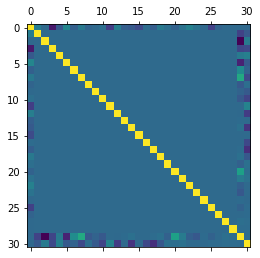

In [21]:

x=df.iloc[:,1:29]
y=df['Amount']
from sklearn.preprocessing import StandardScaler
obj=StandardScaler()
x1=obj.fit_transform(x)
plt.matshow(df.corr())


In [16]:
df_train_all = df[0:150000] 
df_train_1 = df_train_all[df_train_all['Class'] == 1] 
df_train_0 = df_train_all[df_train_all['Class'] == 0]
df_sample=df_train_0.sample(300)
df_train = df_train_1.append(df_sample) 
df_train = df_train.sample(frac=1)
x=df.iloc[:,0:30]
y=df['Class']


In [17]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest=train_test_split(x,y,test_size=0.2,random_state=42)


In [7]:
from sklearn.svm import LinearSVC
obj1=LinearSVC()
obj1.fit(Xtrain,ytrain)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [8]:
print(obj1.score(Xtest,ytest))

0.9984726659878516


In [9]:
(count2-count1)/count2

0.998269524998681

In [39]:
ypred=obj1.predict(Xtest)
confusion_matrix(ytest, ypred)

array([[56858,     6],
       [   81,    17]], dtype=int64)

In [29]:
ytest.shape


(56962,)